In [ ]:
#STEP 1 — Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#STEP 2 - Upload Dataset

file_path = "Attr_Perf.csv"

try:

  df = pd.read_csv(file_path)

  print(f"----few rows of dataset----")
  print(df.head(3))

  print(f"Summary of data : {df.info()}")

except FileNotFoundError:
  print(f"Error: '{file_path}' not found")
  print(f"Please upload correct file ..")

----few rows of dataset----
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0 

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [ ]:
#STEP 3 — Data Cleaning

# Missing values
df.isna().sum()

# Handle duplicates
df.duplicated().sum()
df = df.drop_duplicates()


In [ ]:
df['Attrition_Numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Numeric
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,0


**STEP 4 - Analysis**

# Attrition vs Employee Demographics

Q1. Does age group influence attrition?

Age Group
GenZ           0.273585
Millennials    0.138439
GenX           0.108466
Boomers        0.126437
Name: Attrition_Numeric, dtype: float64
--------------------------------------------------------------------------------


/tmp/ipython-input-2105171612.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attr_by_age = df.groupby('Age Group')['Attrition_Numeric'].mean()
/tmp/ipython-input-2105171612.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attr_by_age.index, y=attr_by_age.values,palette='rocket_r')


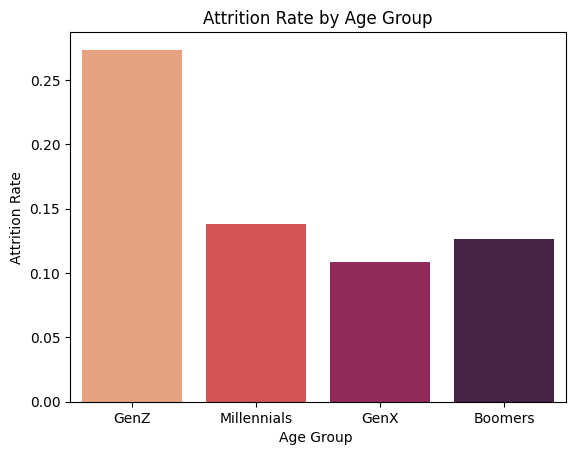

In [ ]:
bins = [18, 29, 40, 53, np.inf]
labels = ["GenZ","Millennials","GenX","Boomers"]

df['Age Group']=pd.cut(df['Age'],bins=bins,labels=labels)

attr_by_age = df.groupby('Age Group')['Attrition_Numeric'].mean()
print(attr_by_age)

print("-"*80)

sns.barplot(x=attr_by_age.index, y=attr_by_age.values,palette='rocket_r')
plt.title("Attrition Rate by Age Group")
plt.xlabel("Age Group ")
plt.ylabel("Attrition Rate")
plt.show()

# Insights:
we see younger employees leave more.

Q2. Are male or female employees more likely to leave?

In [ ]:
gender_attrition = df.pivot_table(values='Attrition_Numeric',
                                  index='Gender', aggfunc=np.mean)
gender_attrition


/tmp/ipython-input-2169873008.py:1: FutureWarning: The provided callable <function mean at 0x7867077bf880> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  gender_attrition = df.pivot_table(values='Attrition_Numeric',


,Attrition_Numeric
Gender,
Female,0.147959
Male,0.170068


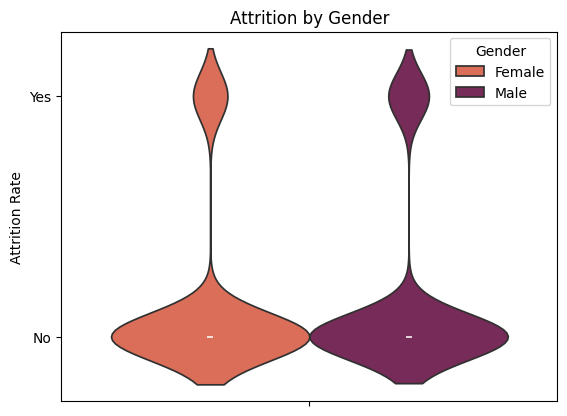

In [ ]:
sns.violinplot(data = df,hue ='Gender',y='Attrition',palette='rocket_r')
plt.title("Attrition by Gender")
plt.ylabel("Attrition Rate")

plt.show()

# Insight:
Male Members leave more often

Q3. Does marital status affect attrition?

/tmp/ipython-input-2247285823.py:1: FutureWarning: The provided callable <function mean at 0x7867077bf880> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  marital_attr = df.groupby('MaritalStatus')['Attrition_Numeric'].agg([np.mean, np.size])


                   mean  size
MaritalStatus                
Divorced       0.100917   327
Married        0.124814   673
Single         0.255319   470
--------------------------------------------------------------------------------


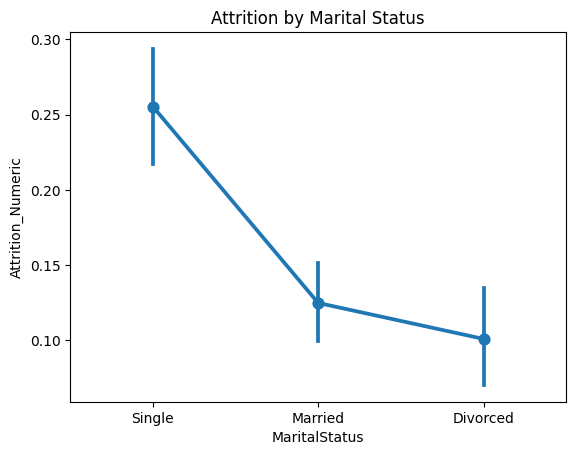

In [ ]:
marital_attr = df.groupby('MaritalStatus')['Attrition_Numeric'].agg([np.mean, np.size])
print(marital_attr)

print('-'*80)

sns.pointplot(data=df, x='MaritalStatus', y='Attrition_Numeric')
plt.title("Attrition by Marital Status")
plt.show()


# Insight:
Single employees often show higher attrition, possibly due to more flexibility to switch jobs.

Q4. Which education field has the highest attrition?

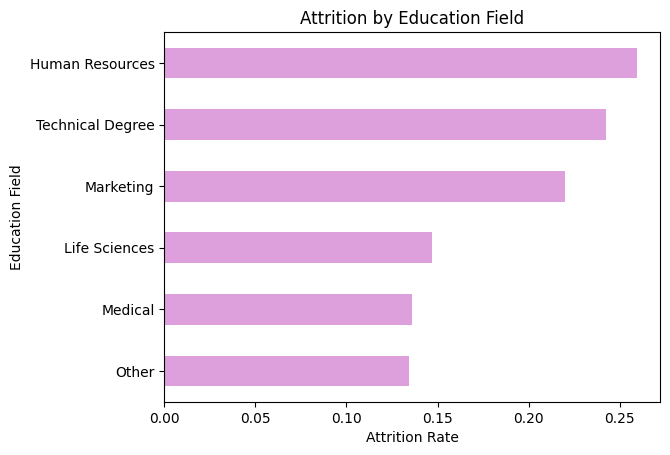

In [ ]:
edu_attr = df.groupby('EducationField')['Attrition_Numeric'].mean().sort_values()

edu_attr.plot(kind='barh', color='plum')
plt.xlabel('Attrition Rate')
plt.ylabel('Education Field')
plt.title("Attrition by Education Field")
plt.show()

# Insight:
People who studied Human Resources has the highest risk of attrition

# Attrition vs Job & Role Factors

Q5. Which Job Role has highest attrition?

Attrition Rate by Job Role:
JobRole
Sales Representative         0.397590
Laboratory Technician        0.239382
Human Resources              0.230769
Sales Executive              0.174847
Research Scientist           0.160959
Manufacturing Director       0.068966
Healthcare Representative    0.068702
Manager                      0.049020
Research Director            0.025000
Name: Attrition_Numeric, dtype: float64
Job Role with Highest Attrition: Sales Representative
Attrition Rate: 0.4
--------------------------------------------------------------------------------


/tmp/ipython-input-3801675476.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='JobRole',y='Attrition_Numeric',palette='rocket_r')


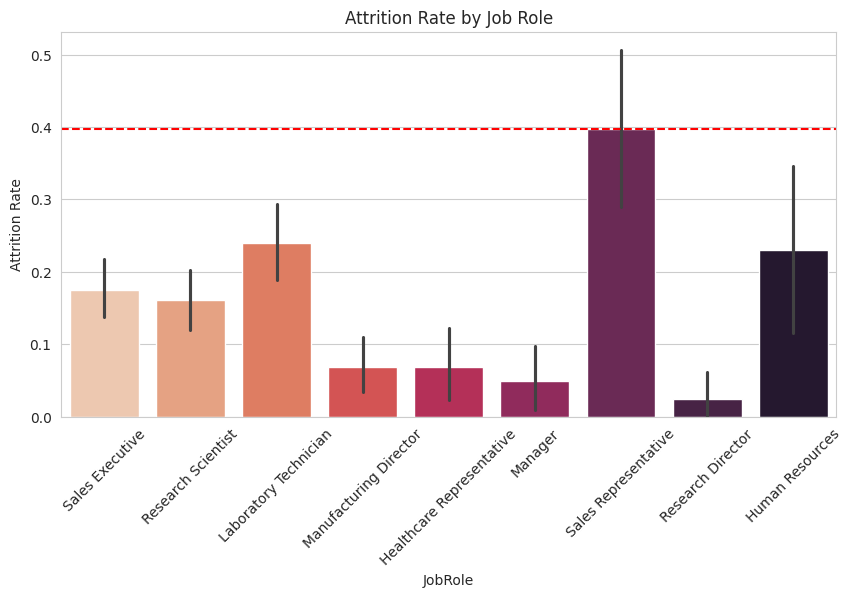

In [ ]:
job_attrition = df.groupby("JobRole")["Attrition_Numeric"].mean().sort_values(ascending=False)

print("Attrition Rate by Job Role:")
print(job_attrition)

# Highest attrition job
highest_role = job_attrition.idxmax()
highest_rate = job_attrition.max()

print("Job Role with Highest Attrition:", highest_role)
print("Attrition Rate:", round(highest_rate, 2))

print('-'*80)

plt.figure(figsize=(10,5))
sns.barplot(data=df,x='JobRole',y='Attrition_Numeric',palette='rocket_r')

# Add dashed line indicating max attrition
plt.axhline(highest_rate, linestyle='--',color='red')

plt.xticks(rotation=45)
plt.title("Attrition Rate by Job Role")
plt.ylabel("Attrition Rate")
plt.show()


# Insights:
Roles like Sales Representative usually show higher attrition.

Q6. Does number of people worked in previous companies influence attrition?

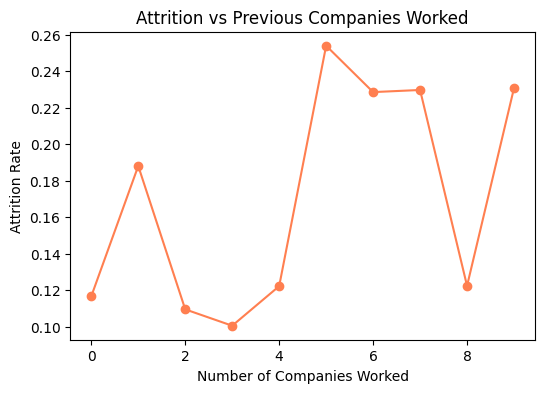

In [ ]:
nc_attr = df.groupby('NumCompaniesWorked')['Attrition_Numeric'].mean()

plt.figure(figsize=(6,4))
plt.plot(nc_attr.index, nc_attr.values, marker='o',color ='coral')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Attrition Rate')
plt.title("Attrition vs Previous Companies Worked")
plt.show()


# Insights:
Higher attrition is common among people who previously switched many companies

Q7. Which Education Field has highest Job Level?

Average Job Level by Education Field:

EducationField
Marketing           2.358491
Human Resources     2.148148
Life Sciences       2.052805
Medical             2.040948
Other               1.987805
Technical Degree    1.871212
Name: JobLevel, dtype: float64
----------------------------------------------------------------------------------------------------


/tmp/ipython-input-2390142438.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='EducationField',y='JobLevel',palette='rocket_r')


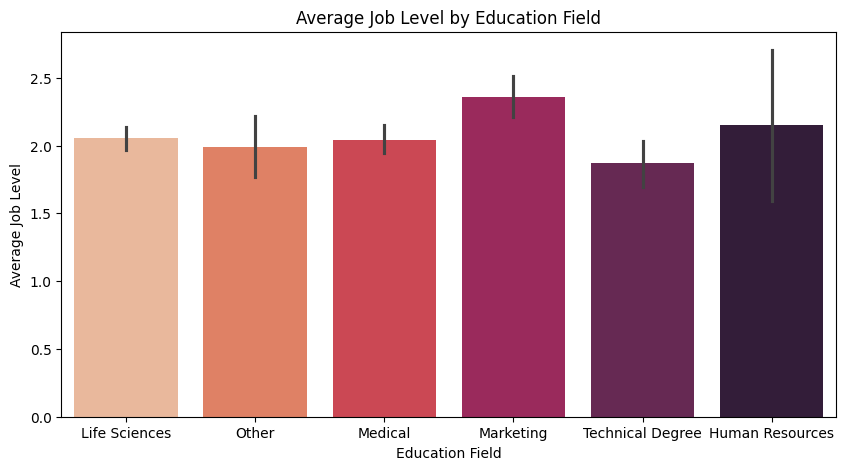

In [ ]:
edu_level = df.groupby("EducationField")["JobLevel"].mean().sort_values(ascending=False)

print("Average Job Level by Education Field:\n")
print(edu_level)
print('-'*100)

plt.figure(figsize=(10,5))
sns.barplot(data=df,x='EducationField',y='JobLevel',palette='rocket_r')
plt.xlabel("Education Field")
plt.ylabel("Average Job Level")
plt.title("Average Job Level by Education Field")
plt.show()


# Insight

Fields like Marketing / HR tend to hold higher-level jobs.

# Work–Life Balance & Productivity

Q8. Does Overtime affect Work-Life Balance?

Average WLB for each Overtime category:
OverTime
No     2.773245
Yes    2.730769
Name: WorkLifeBalance, dtype: float64
--------------------------------------------------------------------------------


/tmp/ipython-input-943594672.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ot_wlb.index, y=ot_wlb.values,palette='rocket_r')


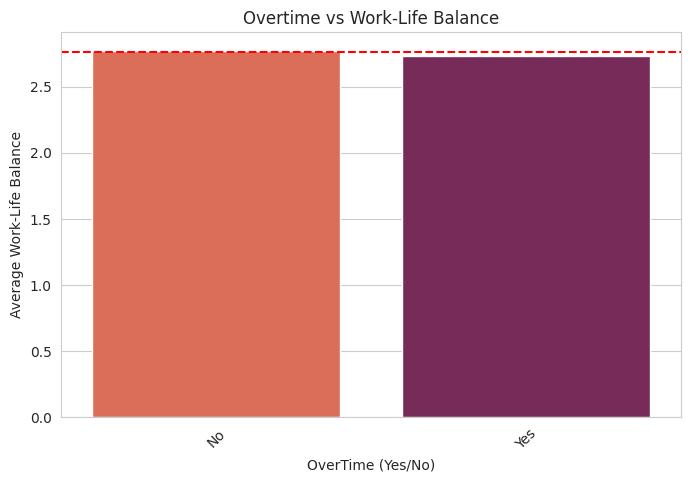

In [ ]:
ot_wlb = df.groupby("OverTime")["WorkLifeBalance"].mean()


ot_wlb_values = np.array(ot_wlb)

print("Average WLB for each Overtime category:")
print(ot_wlb)

print('-'*80)

plt.figure(figsize=(8,5))

# Bar plot
sns.barplot(x=ot_wlb.index, y=ot_wlb.values,palette='rocket_r')

overall_wlb = df["WorkLifeBalance"].mean()
plt.axhline(overall_wlb, linestyle='--',color='red')

plt.xticks(rotation=45)

plt.title("Overtime vs Work-Life Balance")
plt.ylabel("Average Work-Life Balance")
plt.xlabel("OverTime (Yes/No)")
plt.show()

# Insights

There is a small difference between the Work-Life Balance of employees who work overtime vs those who do not. However, the gap is not large enough to conclude that overtime strongly affects work-life balance.

This can indicate: lower attrition risk

Q9. How many years employees stay before promotion?

Years Since Last Promotion vs Average Total Working Years:
YearsSinceLastPromotion
0      9.356282
1     10.212885
2      9.666667
3     13.480769
4     16.131148
5     14.688889
6     14.906250
7     12.671053
8     12.777778
9     14.294118
10    17.666667
11    21.375000
12    24.000000
13    25.600000
14    26.444444
15    26.923077
Name: TotalWorkingYears, dtype: float64


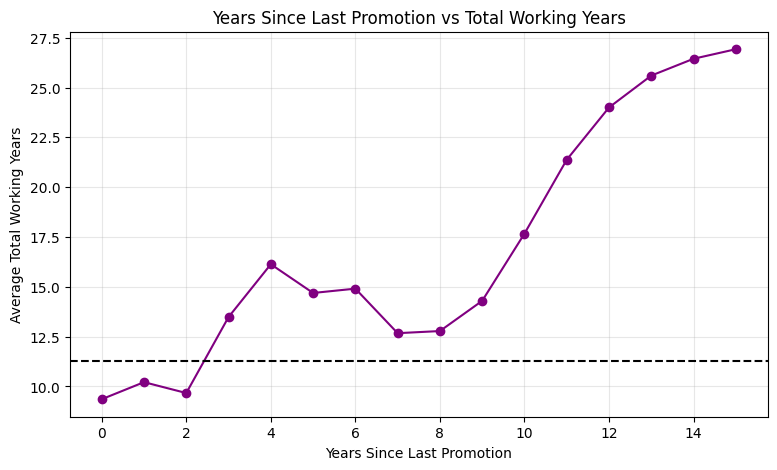

In [ ]:
promo_tenure = df.groupby("YearsSinceLastPromotion")["TotalWorkingYears"].mean()

print("Years Since Last Promotion vs Average Total Working Years:")
print(promo_tenure)

# Overall average working years for comparison
overall_tw = df["TotalWorkingYears"].mean()


plt.figure(figsize=(9,5))
plt.plot(promo_tenure.index, promo_tenure.values, marker='o',color='purple')

# Add dashed line indicating overall
plt.axhline(overall_tw, linestyle='--',color = 'black')

plt.title("Years Since Last Promotion vs Total Working Years")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Average Total Working Years")

plt.grid(True, alpha=0.3)
plt.show()

# insights:
Employees who have not been promoted for many years tend to have higher total working experience.

Q 10. Is Work-Life Balance related to Job Involvement?

WLB_Binned
Good         893
Fair         344
Excellent    153
Poor          80
Name: count, dtype: int64
--------------------------------------------------------------------------------


/tmp/ipython-input-2385909965.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wlb_bin_involvement = df.groupby("WLB_Binned")["JobInvolvement"].mean()


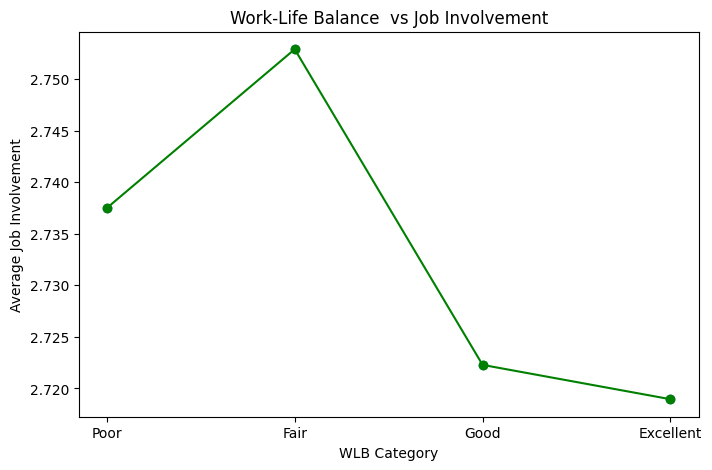

In [ ]:
df["WLB_Binned"] = pd.cut(
    df["WorkLifeBalance"],
    bins=[0, 1, 2, 3, 4],
    labels=["Poor", "Fair", "Good", "Excellent"]
)
print(df["WLB_Binned"].value_counts())

print('-'*80)

wlb_bin_involvement = df.groupby("WLB_Binned")["JobInvolvement"].mean()



plt.figure(figsize=(8,5))

# scatter
plt.scatter(wlb_bin_involvement.index, wlb_bin_involvement.values)

plt.plot(wlb_bin_involvement.index, wlb_bin_involvement.values, marker='o',color='green')

plt.title("Work-Life Balance  vs Job Involvement")
plt.xlabel("WLB Category")
plt.ylabel("Average Job Involvement")

plt.show()


# Insights:
Employees in the “Excellent” WLB category have the lowest involvement, while those in “Fair” WLB show the highest engagement.

Q11. Does OverTime differ in Job Role

--------------------------------------------------------------------------------


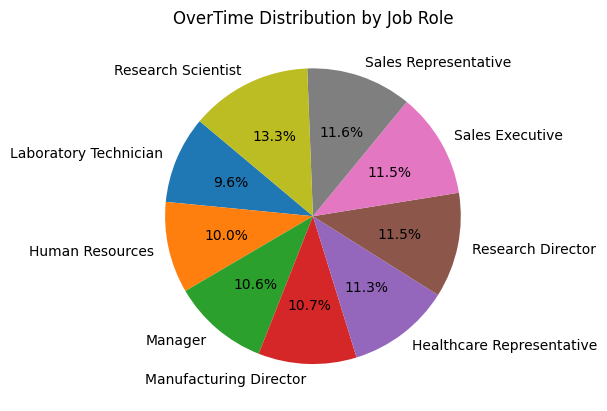

In [ ]:
df["OT_Num"] = np.where(df["OverTime"] == "Yes", 1, 0)


ot_by_role = df.groupby("JobRole")["OT_Num"].mean().sort_values(ascending=True)


print('-'*80)

# Pie chart

plt.pie(ot_by_role, labels=ot_by_role.index, autopct="%1.1f%%", startangle=140)
plt.title("OverTime Distribution by Job Role")
plt.show()

# Insights:
1. This insight helps identify high-pressure roles that may need attention for workload management, employee engagement

# Salary, Income & Financial Metrics

Q12. What is the average salary distribution by Job Role?

                     JobRole  MonthlyIncome
0                    Manager   17181.676471
1          Research Director   16033.550000
2  Healthcare Representative    7528.763359
3     Manufacturing Director    7295.137931
4            Sales Executive    6924.279141
5            Human Resources    4235.750000
6         Research Scientist    3239.972603
7      Laboratory Technician    3237.169884
8       Sales Representative    2626.000000


/tmp/ipython-input-3376045204.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="JobRole", y="MonthlyIncome", data=salary_by_role, palette=colors)


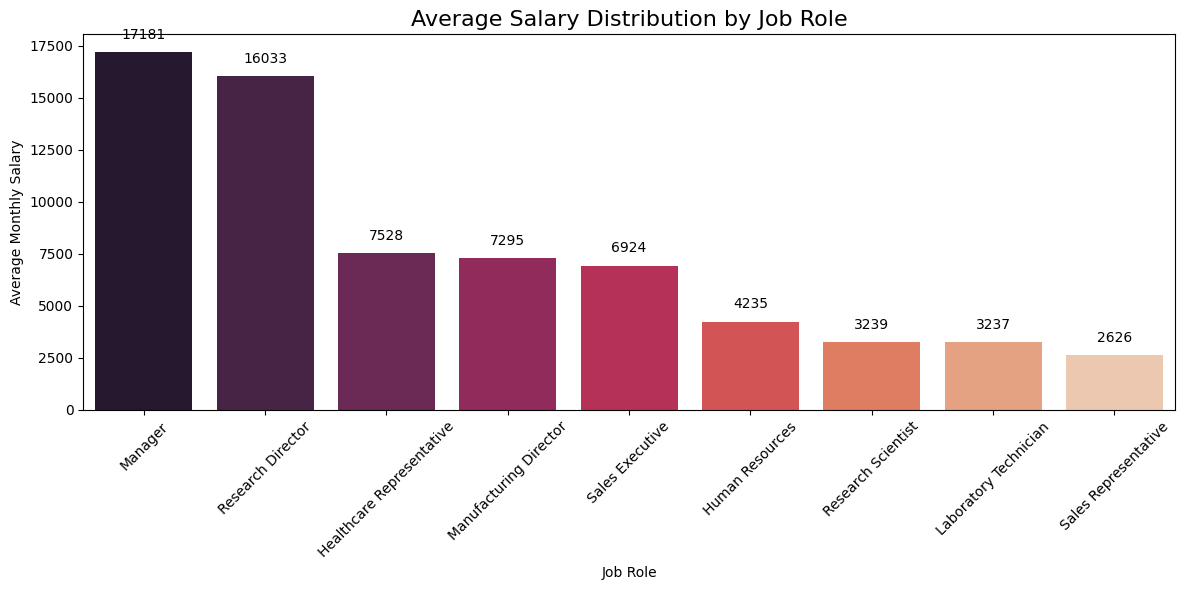

In [ ]:
salary_by_role = df.groupby("JobRole")["MonthlyIncome"].mean().sort_values(ascending=False).reset_index()
print(salary_by_role)


colors = sns.color_palette("rocket", len(salary_by_role))

plt.figure(figsize=(12,6))
sns.barplot(x="JobRole", y="MonthlyIncome", data=salary_by_role, palette=colors)


for i, v in enumerate(salary_by_role["MonthlyIncome"]):
    plt.text(i, v + 500, f"{int(v)}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.title("Average Salary Distribution by Job Role", fontsize=16)
plt.ylabel("Average Monthly Salary")
plt.xlabel("Job Role")
plt.tight_layout()
plt.show()

# Insight:
1. Lower-paying roles (entry-level or support roles) are lighter, indicating pay differences.
2. Higher-paying roles (Managers,RD) are darker, indicates higher pay
3. Higher bars indicate job roles with better compensation Ex, Managerial roles

Q13. Which age group earns the highest?

/tmp/ipython-input-1694929228.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_salary = pd.pivot_table(


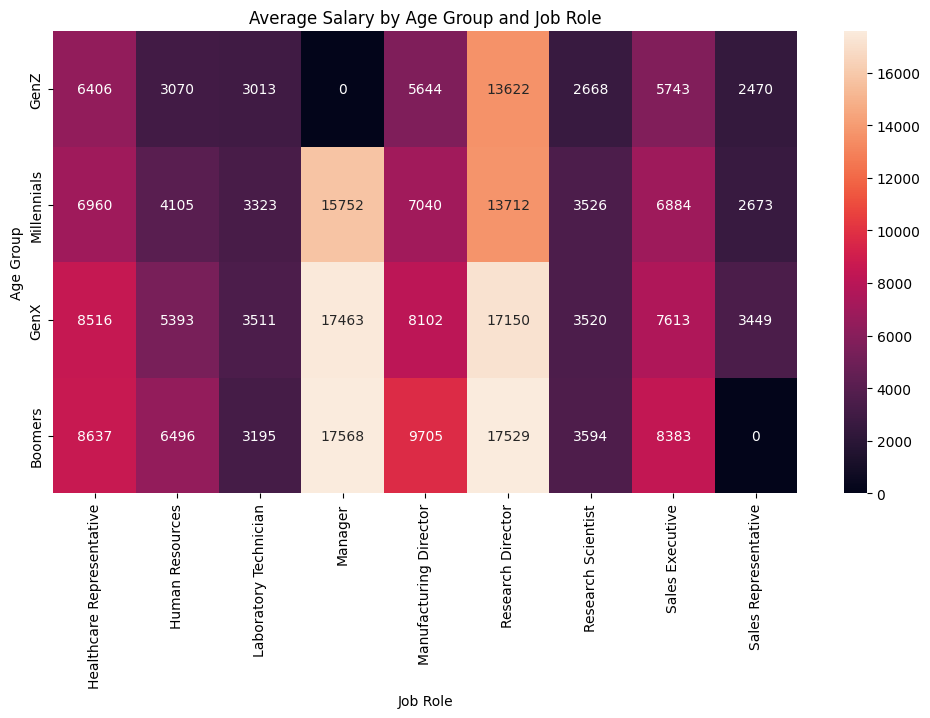

In [ ]:
pivot_salary = pd.pivot_table(
    df,
    values="MonthlyIncome",
    index="Age Group",
    columns="JobRole",
    aggfunc="mean",
    fill_value=0
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_salary, annot=True, fmt=".0f", cmap="rocket")
plt.title("Average Salary by Age Group and Job Role")
plt.xlabel("Job Role")
plt.ylabel("Age Group")
plt.show()

# Insight

1. Millennials often occupy mid-level and higher-paying roles, so their average salaries may be the highest.

2. Gen Z are mostly in entry-level positions with lower salaries.

3. Gen X may have fewer employees but hold senior or managerial roles, leading to higher salaries in specific job roles.

4. The heatmap clearly highlights salary peaks per generation and role, helping in workforce planning and compensation analysis.

Q14. Does distance from home influence income?

Distance_Bin
0-5 km      632
6-10 km     394
11-20 km    240
21-50 km    204
Name: count, dtype: int64
--------------------------------------------------------------------------------
  Distance_Bin  MonthlyIncome
0       0-5 km    6722.006329
3     21-50 km    6649.348039
1      6-10 km    6275.317259
2     11-20 km    6175.245833
--------------------------------------------------------------------------------


/tmp/ipython-input-3511727982.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_distance = df.groupby("Distance_Bin")["MonthlyIncome"].mean().reset_index().sort_values(by="MonthlyIncome", ascending=False)
/tmp/ipython-input-3511727982.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Distance_Bin", y="MonthlyIncome", data=income_by_distance, palette="rocket")


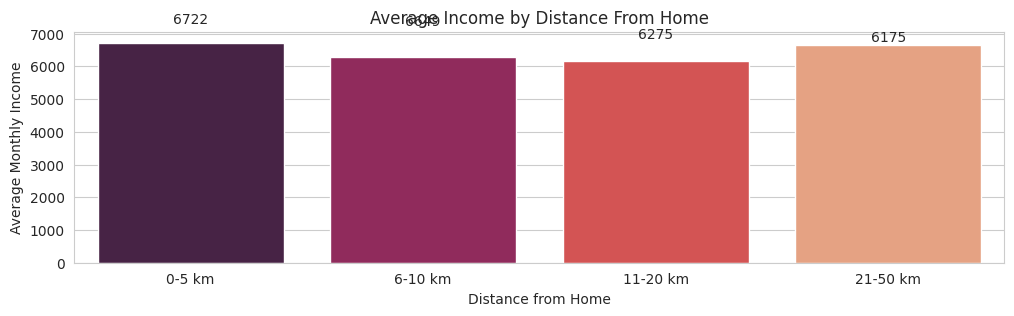

In [ ]:
bins = [0, 5, 10, 20, 50]
labels = ["0-5 km", "6-10 km", "11-20 km", "21-50 km"]
df["Distance_Bin"] = pd.cut(df["DistanceFromHome"], bins=bins, labels=labels)

print(df["Distance_Bin"].value_counts())

print('-'*80)



income_by_distance = df.groupby("Distance_Bin")["MonthlyIncome"].mean().reset_index().sort_values(by="MonthlyIncome", ascending=False)
print(income_by_distance)

print('-'*80)

sns.set_style("whitegrid")
plt.figure(figsize=(12,3))
sns.barplot(x="Distance_Bin", y="MonthlyIncome", data=income_by_distance, palette="rocket")

# Add value labels on top
for i, v in enumerate(income_by_distance["MonthlyIncome"]):
    plt.text(i, v + 500, f"{int(v)}", ha='center', va='bottom', fontsize=10)

plt.title("Average Income by Distance From Home")
plt.xlabel("Distance from Home")
plt.ylabel("Average Monthly Income")
plt.show()

# Insights:
The bar chart shows that average income is similar across all distance groups.

1. Employees living far from the office do not earn significantly more than those living closer.

Q15. Which Department has the highest average Daily Rate?

Department
Research & Development    806.851197
Sales                     800.275785
Human Resources           751.539683
Name: DailyRate, dtype: float64
--------------------------------------------------------------------------------


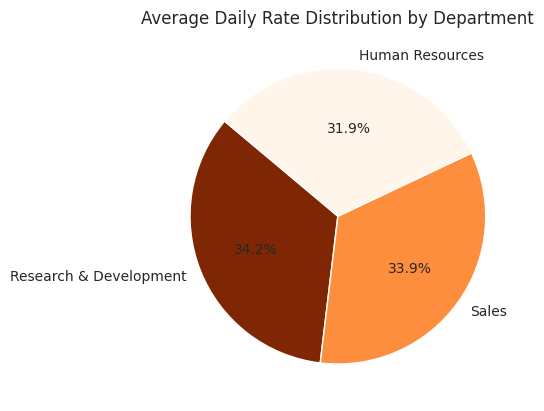

In [ ]:
daily_rate_by_dept = df.groupby("Department")["DailyRate"].mean().sort_values(ascending=False)
print(daily_rate_by_dept)

print('-'*80)

# Pie chart with rocket colors
colors = plt.get_cmap("Oranges_r")(np.linspace(0, 1, len(daily_rate_by_dept)))

plt.pie(daily_rate_by_dept, labels=daily_rate_by_dept.index, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Average Daily Rate Distribution by Department")
plt.show()

# Insights:
Research & Development or Sales departments have higher rates due to specialized or high-experience roles.

# Career Growth, Experience & Skills

Q16. How many years does it take on average to get a promotion?

In [ ]:
df["JobLevel_Label"] = np.where(df["JobLevel"] == 1, "Entry",
                         np.where(df["JobLevel"] == 2, "Junior",
                         np.where(df["JobLevel"] == 3, "Mid",
                         np.where(df["JobLevel"] == 4, "Senior", "Executive"))))

df[["JobLevel", "JobLevel_Label"]].head()


,JobLevel,JobLevel_Label
0,2,Junior
1,2,Junior
2,1,Entry
3,1,Entry
4,1,Entry


JobLevel_Label
Senior       4.839623
Executive    4.594203
Mid          3.353211
Junior       1.885768
Entry        1.193370
Name: YearsSinceLastPromotion, dtype: float64
--------------------------------------------------------------------------------


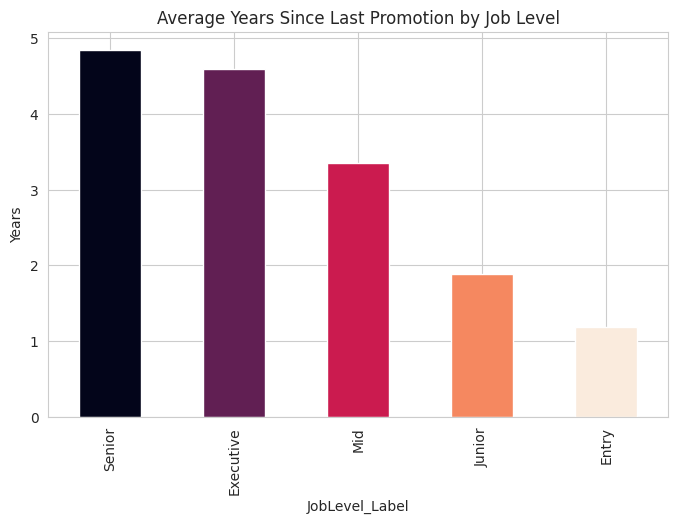

In [ ]:
promo_years_label = df.groupby("JobLevel_Label")["YearsSinceLastPromotion"].mean().sort_values(ascending=False)
print(promo_years_label)

print('-'*80)

promo_years_label.plot(kind='bar', figsize=(8,5), color=plt.get_cmap("rocket")(np.linspace(0,1,len(promo_years_label))))
plt.title("Average Years Since Last Promotion by Job Level")
plt.ylabel("Years")
plt.show()


# Insights
Lower job levels have to  wait longer for their first promotion while higher levels promote faster once their are senior or experienced.


Q17. Does Training Hours improve Performance Rating?


--------------------------------------------------------------------------------


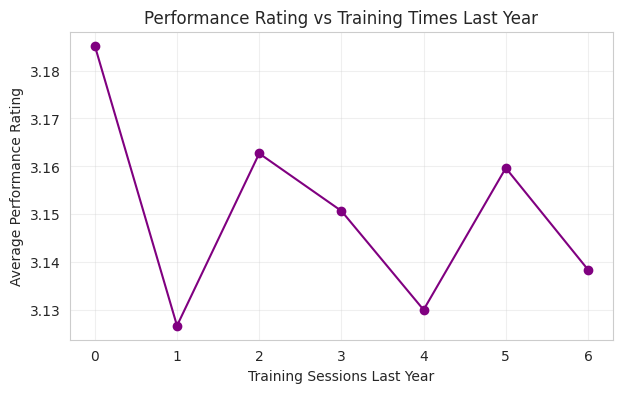

In [ ]:
#traing unique values
training_vals = np.sort(df["TrainingTimesLastYear"].unique())

avg_performance = []

for t in training_vals:
    perf_mean = np.mean(df.loc[df["TrainingTimesLastYear"] == t, "PerformanceRating"])
    avg_performance.append(perf_mean)

avg_performance = np.array(avg_performance)

print('-'*80)

plt.figure(figsize=(7,4))
plt.plot(training_vals, avg_performance, marker='o',color='purple')


plt.title("Performance Rating vs Training Times Last Year")
plt.xlabel("Training Sessions Last Year")
plt.ylabel("Average Performance Rating")
plt.grid(True, alpha=0.3)
plt.show()

# Insights;
1. When employees get more training, their performance gets a little better, especially at the beginning.

2. The first few training sessions help the most.

3. After doing many trainings, performance doesn’t increase much more  it stays the same.

4. This means training is useful, but doing too many trainings doesn’t always help.

 Q18 .does longer tenured employee stay in company or tend to leave

  Tenure_Group  YearsAtCompany
0     6-10 yrs               6
1     6-10 yrs              10
2      0-2 yrs               0
3     6-10 yrs               8
4      0-2 yrs               2
----------------------------------------------------------------------------------------------------


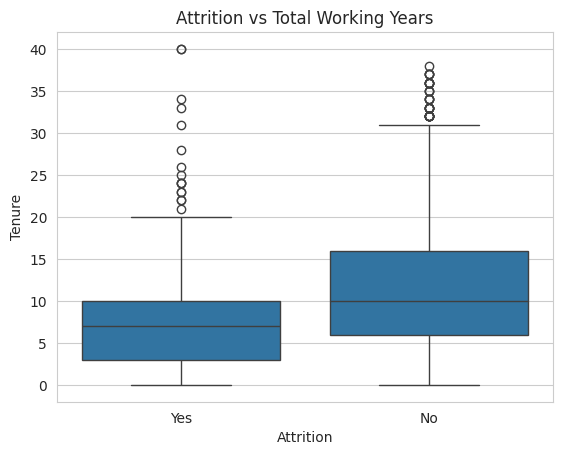

In [ ]:
bins = [0, 2, 5, 10, 40]
labels = ["0-2 yrs", "3-5 yrs", "6-10 yrs", "10+ yrs"]

df["Tenure_Group"] = pd.cut(
    df["YearsAtCompany"],
    bins=bins,
    labels=labels,
    include_lowest=True
)


print(df[["Tenure_Group",'YearsAtCompany']].head(5))

print('-'*100)

sns.boxplot(
    data=df,
    x='Attrition',
    y='TotalWorkingYears'
    )
plt.title('Attrition vs Total Working Years')
plt.xlabel('Attrition')
plt.ylabel('Tenure')
plt.show()

# Insights:

Employees with 0–5 years of tenure show the highest attrition, and attrition decreases as tenure increases.

Q19. Does experience increase the chance of reaching higher Job Levels?

   JobLevel JobLevel_Label
0         2         Junior
1         2         Junior
2         1    Entry Level
3         1    Entry Level
4         1    Entry Level
--------------------------------------------------------------------------------
                TotalWorkingYears
JobLevel_Label                   
Executive               26.376812
Senior                  25.471698
Mid Level               15.119266
Junior                  10.423221
Entry Level              5.891344
--------------------------------------------------------------------------------


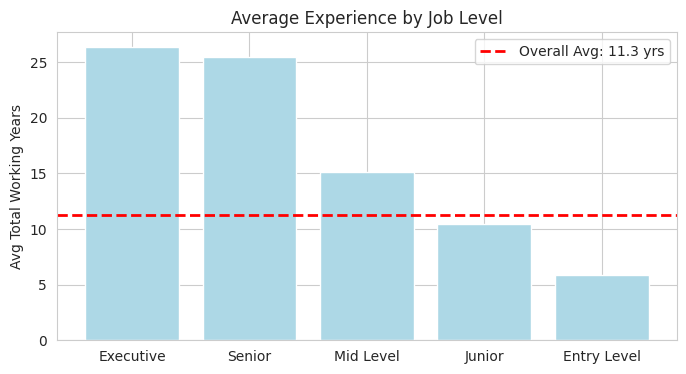

In [ ]:

job_level_map = {
    1: "Entry Level",
    2: "Junior",
    3: "Mid Level",
    4: "Senior",
    5: "Executive"
}

df["JobLevel_Label"] = df["JobLevel"].map(job_level_map)

# Check
print(df[["JobLevel", "JobLevel_Label"]].head(5))

exp_lvl_label = pd.pivot_table(
    df,
    values="TotalWorkingYears",
    index="JobLevel_Label",
    aggfunc="mean"
).sort_values(by="TotalWorkingYears", ascending=False)

print('-'*80)

print(exp_lvl_label)

print('-'*80)

overall_avg = df["TotalWorkingYears"].mean()

plt.figure(figsize=(8,4))
plt.bar(exp_lvl_label.index, exp_lvl_label["TotalWorkingYears"],color = 'lightblue')

# Add average line
plt.axhline(
    y=overall_avg,
    linestyle="--",
    linewidth=2,
    label=f"Overall Avg: {overall_avg:.1f} yrs",
    color="red"
)

plt.title("Average Experience by Job Level")
plt.ylabel("Avg Total Working Years")
plt.legend()
plt.show()

# Isights:
1. Employees with more experience tend to have higher job levels.

2. The 0–5 years group mostly stays at entry or junior levels.

3. The 20+ years group has the highest average job level, showing clear career progression over time.

4. Entry and Junior levels fall below average, while Senior and Executive roles are well above average.

Q20. Is employee compensation aligned with their experience, career growth, and skill level?”

    TotalWorkingYears  JobLevel  MonthlyIncome  ExpectedPay Pay_Status
0                   8         2           5993         7000  Underpaid
1                  10         2           5130         8000  Underpaid
2                   7         1           2090         5000  Underpaid
3                   8         1           2909         5500  Underpaid
4                   6         1           3468         4500  Underpaid
5                   8         1           3068         5500  Underpaid
6                  12         1           2670         7500  Underpaid
7                   1         1           2693         2000   Overpaid
8                  10         3           9526         9500   Overpaid
9                  17         2           5237        11500  Underpaid
10                  6         1           2426         4500  Underpaid
11                 10         2           4193         8000  Underpaid
12                  5         1           2911         4000  Underpaid
13    

/tmp/ipython-input-521968781.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pay_Status", y="MonthlyIncome", data=df, palette="rocket")


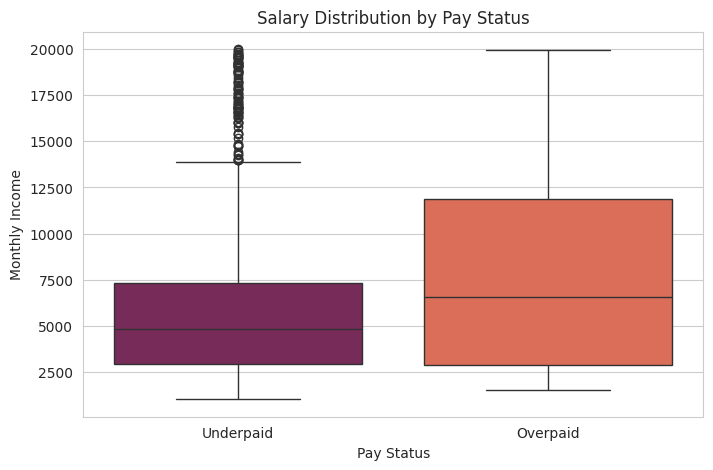

In [ ]:
df["ExpectedPay"] = (
    df["TotalWorkingYears"] * 500 +  # experience factor that will addup every year
    df["JobLevel"] * 1500            # career growth factor after every new level
)


df["Pay_Status"] = np.where(df["MonthlyIncome"] < df["ExpectedPay"], "Underpaid",
                            np.where(df["MonthlyIncome"] > df["ExpectedPay"], "Overpaid", "Fairly Paid"))

print(df[["TotalWorkingYears", "JobLevel", "MonthlyIncome", "ExpectedPay", "Pay_Status"]].head(20))


print('-'*80)


plt.figure(figsize=(8,5))
sns.boxplot(x="Pay_Status", y="MonthlyIncome", data=df, palette="rocket")

plt.title("Salary Distribution by Pay Status")
plt.xlabel("Pay Status")
plt.ylabel("Monthly Income")
plt.show()

# Insights:
1. **Underpaid Employees**


*   Median salary is around 5000, significantly lower than the  overpaid.
*  There are many outliers above the median, it means some underpaid employees are much close to fair pay, but doest match the expected range.

2. **Overpaid Employees**


*   Median salary is higher than underpaid, around 6500–7000, with some employees earning up to 20000.
*   it shows few employees get very high salaries, likely senior or highly skilled staff.







# Dashboard

1. Attrition Vs Employee Demographics

/tmp/ipython-input-1068495906.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attr_by_age.index, y=attr_by_age.values,palette='mako',ax=axes[0,0])
/tmp/ipython-input-1068495906.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data=df, x='MaritalStatus', y='Attrition_Numeric',ax=axes[1,1],palette='mako')


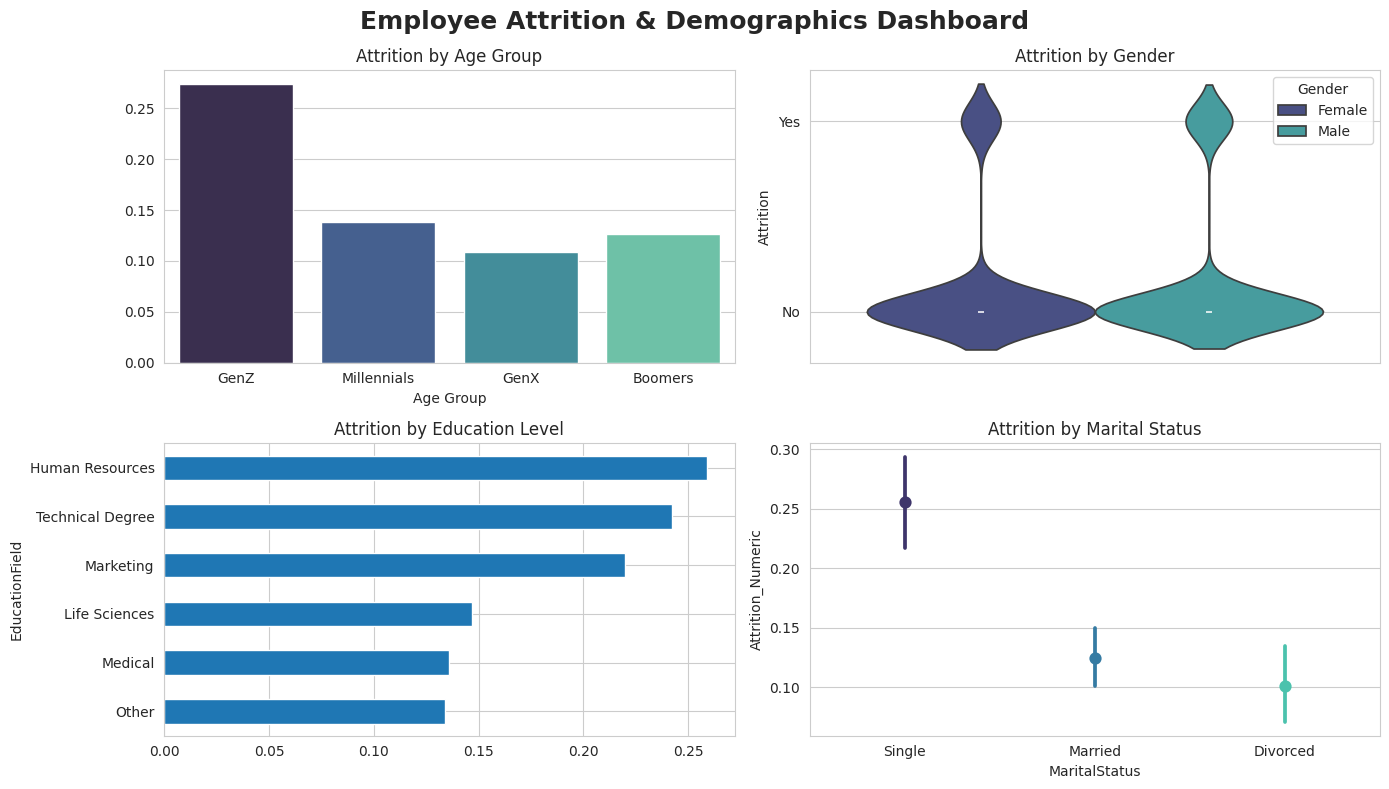

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14,8))
fig.suptitle("Employee Attrition & Demographics Dashboard", fontsize=18, fontweight='bold')

sns.barplot(x=attr_by_age.index, y=attr_by_age.values,palette='mako',ax=axes[0,0])
axes[0,0].set_title('Attrition by Age Group')


sns.violinplot(data = df,hue ='Gender',y='Attrition',palette='mako',ax=axes[0,1])
axes[0,1].set_title("Attrition by Gender")


sns.pointplot(data=df, x='MaritalStatus', y='Attrition_Numeric',ax=axes[1,1],palette='mako')
axes[1,1].set_title("Attrition by Marital Status")


edu_attr.plot(kind='barh', color='#1f77b4',ax=axes[1,0])
axes[1,0].set_title("Attrition by Education Level")


plt.tight_layout()
plt.show()

2. Attrition vs Job & Role Factors

/tmp/ipython-input-1430352382.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_level.index, y=edu_level.values, palette='rocket_r', ax=axes[1])
/tmp/ipython-input-1430352382.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(edu_level.index, rotation=45, ha='right')
/tmp/ipython-input-1430352382.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_attrition.index, y=job_attrition.values, palette='rocket_r', ax=axes[2])
/tmp/ipython-input-1430352382.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using 

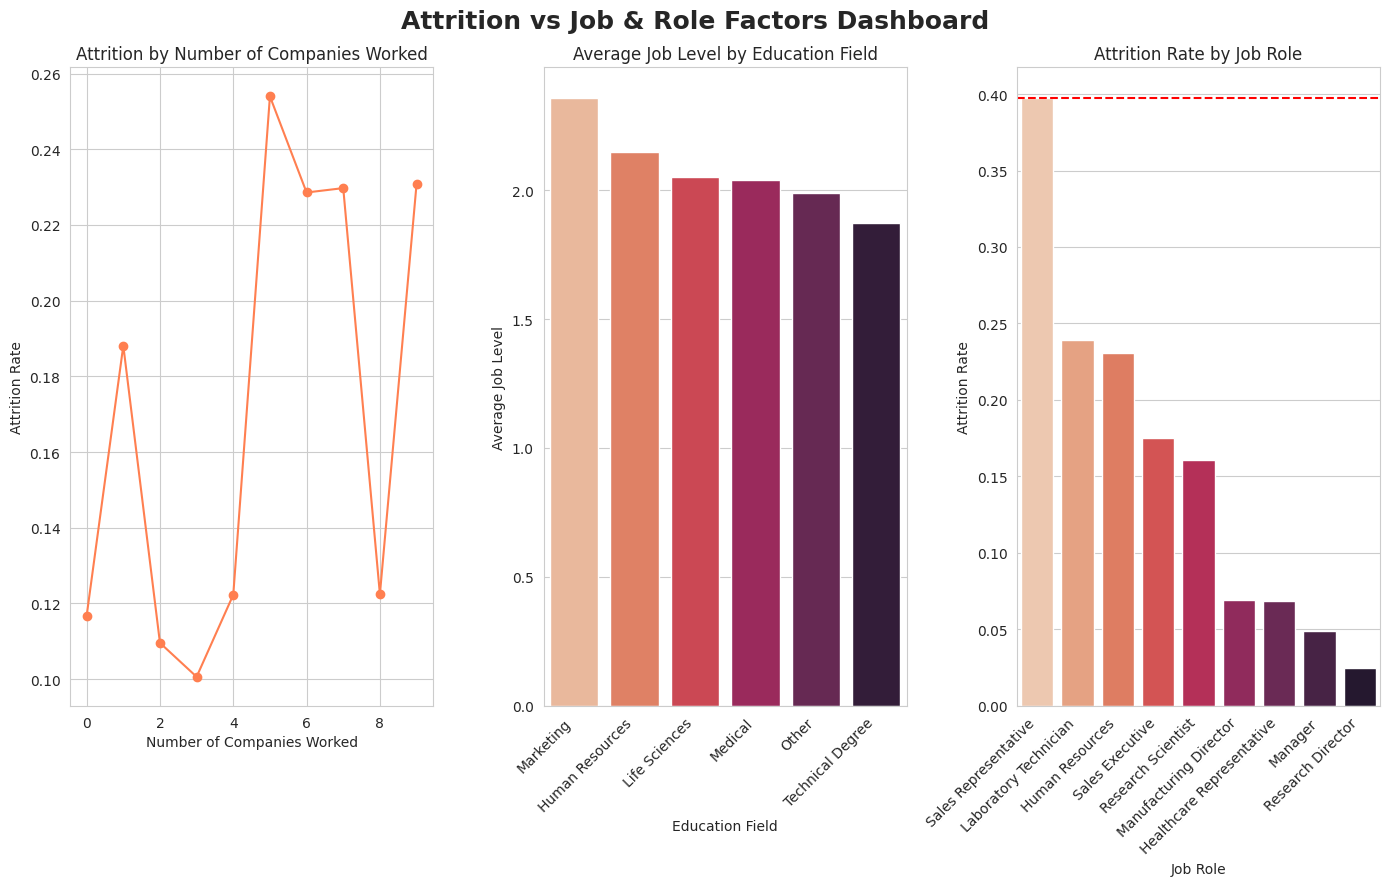

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14,9))
fig.suptitle("Attrition vs Job & Role Factors Dashboard", fontsize=18, fontweight='bold')

# Q6. Attrition by Number of Companies Worked
axes[0].plot(nc_attr.index, nc_attr.values, marker='o',color ='coral')
axes[0].set_title('Attrition by Number of Companies Worked')
axes[0].set_xlabel('Number of Companies Worked')
axes[0].set_ylabel('Attrition Rate')

# Q7. Average Job Level by Education Field
sns.barplot(x=edu_level.index, y=edu_level.values, palette='rocket_r', ax=axes[1])
axes[1].set_title('Average Job Level by Education Field')
axes[1].set_xlabel('Education Field')
axes[1].set_ylabel('Average Job Level')
axes[1].set_xticklabels(edu_level.index, rotation=45, ha='right')


# Q5. Attrition by Job Role
sns.barplot(x=job_attrition.index, y=job_attrition.values, palette='rocket_r', ax=axes[2])
axes[2].axhline(highest_rate, linestyle='--',color='red')
axes[2].set_title('Attrition Rate by Job Role')
axes[2].set_xlabel('Job Role')
axes[2].set_ylabel('Attrition Rate')
axes[2].set_xticklabels(job_attrition.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

3. Work–Life Balance & Productivity

/tmp/ipython-input-3610151305.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ot_wlb.index, y=ot_wlb.values, palette='rocket_r', ax=axes[0,0])
/tmp/ipython-input-3610151305.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(ot_wlb.index, rotation=45, ha='right')


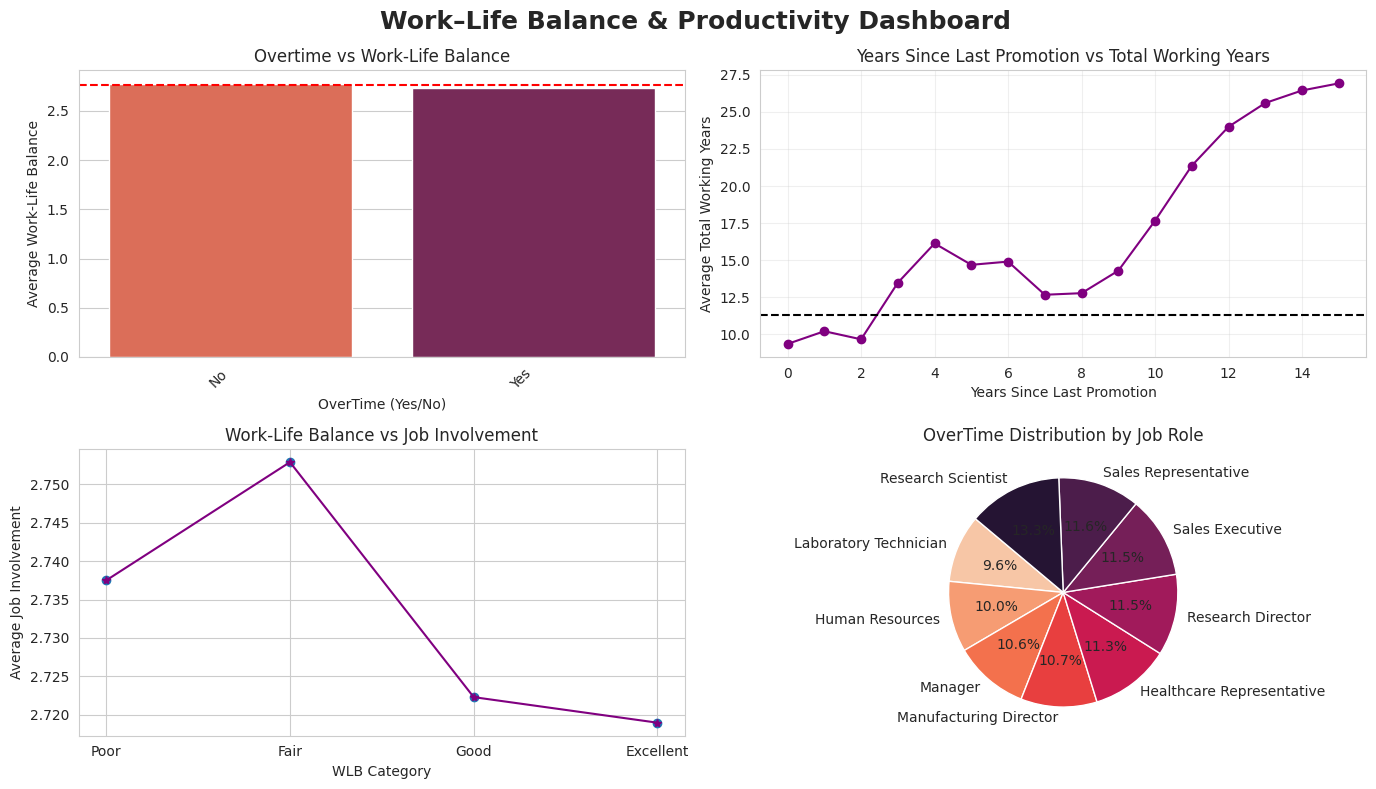

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14,8))
fig.suptitle("Work–Life Balance & Productivity Dashboard", fontsize=18, fontweight='bold')

# Q8. Overtime vs Work-Life Balance
sns.barplot(x=ot_wlb.index, y=ot_wlb.values, palette='rocket_r', ax=axes[0,0])
axes[0,0].axhline(overall_wlb, linestyle='--', color='red')
axes[0,0].set_xticklabels(ot_wlb.index, rotation=45, ha='right')
axes[0,0].set_title("Overtime vs Work-Life Balance")
axes[0,0].set_xlabel("OverTime (Yes/No)")
axes[0,0].set_ylabel("Average Work-Life Balance")

# Q9. How many years employees stay before promotion?
axes[0,1].plot(promo_tenure.index, promo_tenure.values, marker='o',color='purple')
axes[0,1].axhline(overall_tw, linestyle='--',color = 'black')
axes[0,1].set_title("Years Since Last Promotion vs Total Working Years")
axes[0,1].set_xlabel("Years Since Last Promotion")
axes[0,1].set_ylabel("Average Total Working Years")
axes[0,1].grid(True, alpha=0.3)

# Q10. Is Work-Life Balance related to Job Involvement?
axes[1,0].scatter(wlb_bin_involvement.index, wlb_bin_involvement.values)
axes[1,0].plot(wlb_bin_involvement.index, wlb_bin_involvement.values, marker='*',color='purple')
axes[1,0].set_title("Work-Life Balance vs Job Involvement")
axes[1,0].set_xlabel("WLB Category")
axes[1,0].set_ylabel("Average Job Involvement")

# Q11. Does OverTime differ in Job Role?
pie_colors = sns.color_palette('rocket_r', n_colors=len(ot_by_role))
axes[1,1].pie(ot_by_role, labels=ot_by_role.index, autopct="%1.1f%%", startangle=140, colors=pie_colors)
axes[1,1].set_title("OverTime Distribution by Job Role")

plt.tight_layout()
plt.show()

4. Salary, Income & Financial Metrics

/tmp/ipython-input-4191461664.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="JobRole", y="MonthlyIncome", data=salary_by_role, palette=colors, ax=axes[0,0])
/tmp/ipython-input-4191461664.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x="JobRole", y="MonthlyIncome", data=salary_by_role, palette=colors, ax=axes[0,0])
/tmp/ipython-input-4191461664.py:5: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="JobRole", y="MonthlyIncome", data=salary_by_role, palette=colors, ax=axes[0,0])
/tmp/ipython-input-4191461664.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fix

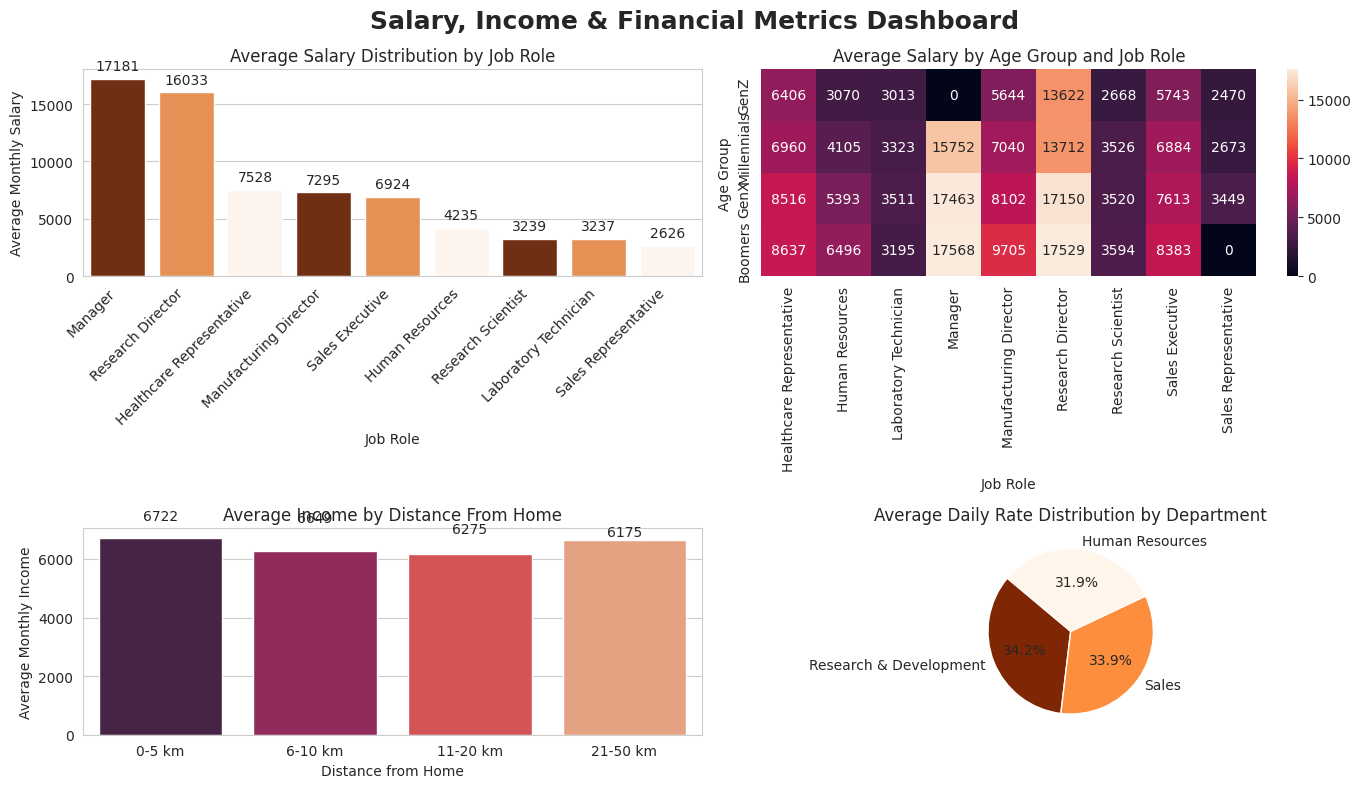

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14,8))
fig.suptitle("Salary, Income & Financial Metrics Dashboard", fontsize=18, fontweight='bold')


sns.barplot(x="JobRole", y="MonthlyIncome", data=salary_by_role, palette=colors, ax=axes[0,0])
axes[0,0].set_xticklabels(salary_by_role["JobRole"], rotation=45, ha='right')
axes[0,0].set_title("Average Salary Distribution by Job Role")
axes[0,0].set_xlabel("Job Role")
axes[0,0].set_ylabel("Average Monthly Salary")

# Add value labels on top
for i, v in enumerate(salary_by_role["MonthlyIncome"]):
    axes[0,0].text(i, v + 500, f"{int(v)}", ha='center', va='bottom', fontsize=10)


sns.heatmap(pivot_salary, annot=True, fmt=".0f", cmap="rocket", ax=axes[0,1])
axes[0,1].set_title("Average Salary by Age Group and Job Role")
axes[0,1].set_xlabel("Job Role")
axes[0,1].set_ylabel("Age Group")


sns.barplot(x="Distance_Bin", y="MonthlyIncome", data=income_by_distance, palette="rocket", ax=axes[1,0])
axes[1,0].set_title("Average Income by Distance From Home")
axes[1,0].set_xlabel("Distance from Home")
axes[1,0].set_ylabel("Average Monthly Income")

# Add value labels on top
for i, v in enumerate(income_by_distance["MonthlyIncome"]):
    axes[1,0].text(i, v + 500, f"{int(v)}", ha='center', va='bottom', fontsize=10)


pie_colors_q15 = plt.get_cmap("Oranges_r")(np.linspace(0, 1, len(daily_rate_by_dept)))
axes[1,1].pie(daily_rate_by_dept, labels=daily_rate_by_dept.index, autopct="%1.1f%%", colors=pie_colors_q15, startangle=140)
axes[1,1].set_title("Average Daily Rate Distribution by Department")

plt.tight_layout()
plt.show()